In [65]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

df = pd.read_csv(r'/Users/Mike/Downloads/movies.csv')

In [10]:
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [16]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

index - 0%
budget - 0%
genres - 1%
homepage - 64%
id - 0%
keywords - 9%
original_language - 0%
original_title - 0%
overview - 0%
popularity - 0%
production_companies - 0%
production_countries - 0%
release_date - 0%
revenue - 0%
runtime - 0%
spoken_languages - 0%
status - 0%
tagline - 18%
title - 0%
vote_average - 0%
vote_count - 0%
cast - 1%
crew - 0%
director - 1%


In [18]:
df.dtypes

index                     int64
budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
cast                     object
crew                     object
director                 object
dtype: object

In [21]:
df['budget'] = df['budget'].astype('int64')


In [53]:
df['release_date'] = df['release_date'].astype(str).str[:4]

df.revenue


0       2787965087
1        961000000
2        880674609
3       1084939099
4        284139100
           ...    
4798       2040920
4799             0
4800             0
4801             0
4802             0
Name: revenue, Length: 4803, dtype: int64

In [55]:
df.sort_values(by=['revenue'], inplace=False, ascending=False)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,year_realesed
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron,2009
25,25,200000000,Drama Romance Thriller,http://www.titanicmovie.com,597,shipwreck iceberg ship panic titanic,en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Nothing on Earth could come between them.,Titanic,7.5,7562,Kate Winslet Leonardo DiCaprio Frances Fisher ...,"[{'name': 'Mali Finn', 'gender': 1, 'departmen...",James Cameron,1997
16,16,220000000,Science Fiction Action Adventure,http://marvel.com/avengers_movie/,24428,new york shield marvel comic superhero based o...,en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some assembly required.,The Avengers,7.4,11776,Robert Downey Jr. Chris Evans Mark Ruffalo Chr...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Joss Whedon,2012
28,28,150000000,Action Adventure Science Fiction Thriller,http://www.jurassicworld.com/,135397,monster dna tyrannosaurus rex velociraptor island,en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The park is open.,Jurassic World,6.5,8662,Chris Pratt Bryce Dallas Howard Irrfan Khan Vi...,"[{'name': 'Steven Spielberg', 'gender': 2, 'de...",Colin Trevorrow,2015
44,44,190000000,Action,http://www.furious7.com/,168259,car race speed revenge suspense car,en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102.322217,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Vengeance Hits Home,Furious 7,7.3,4176,Vin Diesel Paul Walker Dwayne Johnson Michelle...,"[{'name': 'James Wan', 'gender': 2, 'departmen...",James Wan,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4791,4791,13,Horror,http://tincanmanthemovie.com/,157185,home invasion,en,Tin Can Man,Recently dumped by his girlfirend for another ...,0.332679,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Everything You've Heard is True,Tin Can Man,2.0,1,Michael Parle Emma Eliza Regan Patrick O'Donne...,"[{'name': 'Ivan Kavanagh', 'gender': 0, 'depar...",Ivan Kavanagh,2007
4790,4790,0,Drama Foreign,NaN,13898,NaN,fa,دایره,Various women struggle to function in the oppr...,1.193779,...,"[{""iso_639_1"": ""fa"", ""name"": ""\u0641\u0627\u06...",Released,NaN,The Circle,6.6,17,Nargess Mamizadeh Maryiam Palvin Almani Mojgan...,"[{'name': 'Kambuzia Partovi', 'gender': 0, 'de...",Jafar Panahi,2000
4789,4789,0,Drama,NaN,39851,addiction recovering drug addict estranged son,en,Clean,"After losing her husband to a heroin overdose,...",1.464566,...,"[{""iso_639_1"": ""cn"", ""name"": ""\u5e7f\u5dde\u8b...",Released,"When you don't have a choice, you change.",Clean,6.7,17,Maggie Cheung Nick Nolte B\u00e9atrice Dalle J...,"[{'name': 'Olivier Assayas', 'gender': 2, 'dep...",Olivier Assayas,2004
4707,4707,0,Thriller Drama Horror,NaN,50497,newspaper exorcism poltergeist priest haunting,en,When the Lights Went Out,"Yorkshire, 1974, the Maynard family moves into...",2.805351,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Set in 1974 and based on true events.,When the Lights Went Out,5.8,49,Kate Ashfield Jo Hartley Martin Compston Steve...,"[{'name': 'Des Hamilton', 'gender': 0, 'depart...",Pat Holden,2012


In [81]:
df = df.sort_values(by=['revenue'], inplace=False, ascending=False)
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
25,25,200000000,Drama Romance Thriller,http://www.titanicmovie.com,597,shipwreck iceberg ship panic titanic,en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,...,194.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Nothing on Earth could come between them.,Titanic,7.5,7562,Kate Winslet Leonardo DiCaprio Frances Fisher ...,"[{'name': 'Mali Finn', 'gender': 1, 'departmen...",James Cameron
16,16,220000000,Science Fiction Action Adventure,http://marvel.com/avengers_movie/,24428,new york shield marvel comic superhero based o...,en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,...,143.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some assembly required.,The Avengers,7.4,11776,Robert Downey Jr. Chris Evans Mark Ruffalo Chr...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Joss Whedon
28,28,150000000,Action Adventure Science Fiction Thriller,http://www.jurassicworld.com/,135397,monster dna tyrannosaurus rex velociraptor island,en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,...,124.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The park is open.,Jurassic World,6.5,8662,Chris Pratt Bryce Dallas Howard Irrfan Khan Vi...,"[{'name': 'Steven Spielberg', 'gender': 2, 'de...",Colin Trevorrow
44,44,190000000,Action,http://www.furious7.com/,168259,car race speed revenge suspense car,en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102.322217,...,137.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Vengeance Hits Home,Furious 7,7.3,4176,Vin Diesel Paul Walker Dwayne Johnson Michelle...,"[{'name': 'James Wan', 'gender': 2, 'departmen...",James Wan


In [123]:
df['production_companies'].drop_duplicates().sort_values(ascending=False)
pd.set_option('display.max_rows', None)

In [84]:
df['production_companies'].drop_duplicates().sort_values(ascending=False)

4802    [{"name": "rusty bear entertainment", "id": 87...
4597          [{"name": "kNow Productions", "id": 14911}]
3536                       [{"name": "icon", "id": 4096}]
3489    [{"name": "i5 Films", "id": 26927}, {"name": "...
2519                 [{"name": "area japan", "id": 6536}]
                              ...                        
368     [{"name": "1492 Pictures", "id": 436}, {"name"...
3389        [{"name": "101st Street Films", "id": 54684}]
2064    [{"name": "100 Bares", "id": 5517}, {"name": "...
3839    [{"name": "100 Bares", "id": 5517}, {"name": "...
1011                                                   []
Name: production_companies, Length: 3697, dtype: object

In [85]:
df

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,year_realesed
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron,2009
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski,2007
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes,2015
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan,2012
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,Action Crime Thriller,NaN,9367,united states\u2013mexico barrier legs arms pa...,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,...,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,Carlos Gallardo Jaime de Hoyos Peter Marquardt...,"[{'name': 'Robert Rodriguez', 'gender': 0, 'de...",Robert Rodriguez,1992
4799,4799,9000,Comedy Romance,NaN,72766,NaN,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,...,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,"[{'name': 'Edward Burns', 'gender': 2, 'depart...",Edward Burns,2011
4800,4800,0,Comedy Drama Romance TV Movie,http://www.hallmarkchannel.com/signedsealeddel...,231617,date love at first sight narration investigati...,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,"[{'name': 'Carla Hetland', 'gender': 0, 'depar...",Scott Smith,2013
4801,4801,0,NaN,http://shanghaicalling.com/,126186,NaN,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,...,"[{""iso_639_1"": ""en"", "

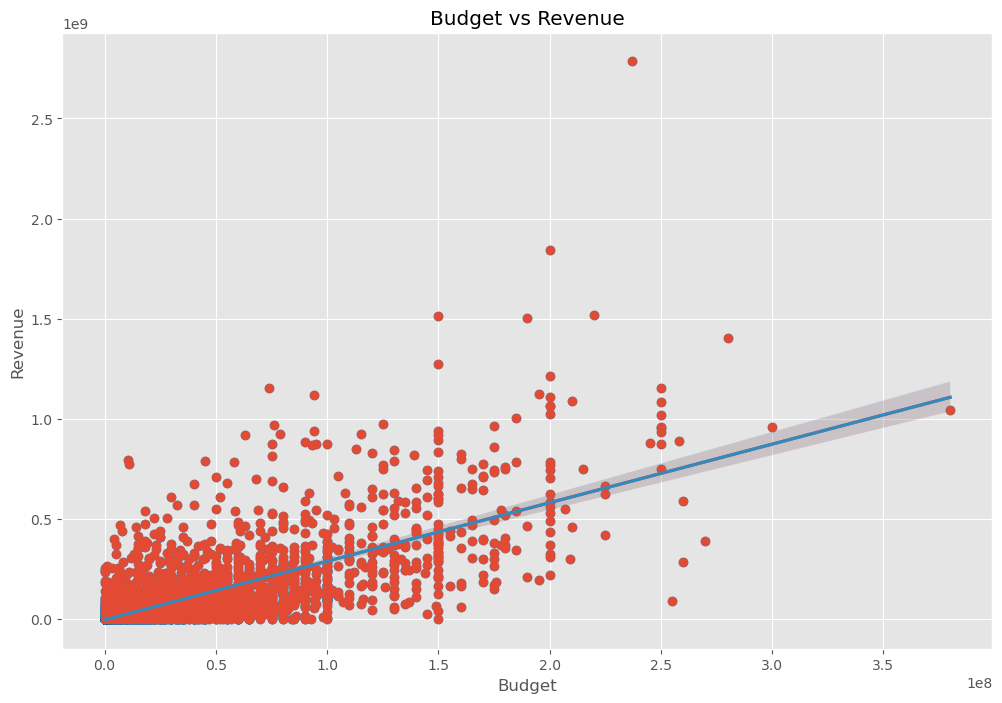

In [99]:
plt.scatter(x=df['budget'], y=df['revenue'])
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

In [96]:
df.head()


,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,year_realesed
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron,2009
25,25,200000000,Drama Romance Thriller,http://www.titanicmovie.com,597,shipwreck iceberg ship panic titanic,en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Nothing on Earth could come between them.,Titanic,7.5,7562,Kate Winslet Leonardo DiCaprio Frances Fisher ...,"[{'name': 'Mali Finn', 'gender': 1, 'departmen...",James Cameron,1997
16,16,220000000,Science Fiction Action Adventure,http://marvel.com/avengers_movie/,24428,new york shield marvel comic superhero based o...,en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some assembly required.,The Avengers,7.4,11776,Robert Downey Jr. Chris Evans Mark Ruffalo Chr...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Joss Whedon,2012
28,28,150000000,Action Adventure Science Fiction Thriller,http://www.jurassicworld.com/,135397,monster dna tyrannosaurus rex velociraptor island,en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The park is open.,Jurassic World,6.5,8662,Chris Pratt Bryce Dallas Howard Irrfan Khan Vi...,"[{'name': 'Steven Spielberg', 'gender': 2, 'de...",Colin Trevorrow,2015
44,44,190000000,Action,http://www.furious7.com/,168259,car race speed revenge suspense car,en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102.322217,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Vengeance Hits Home,Furious 7,7.3,4176,Vin Diesel Paul Walker Dwayne Johnson Michelle...,"[{'name': 'James Wan', 'gender': 2, 'departmen...",James Wan,2015


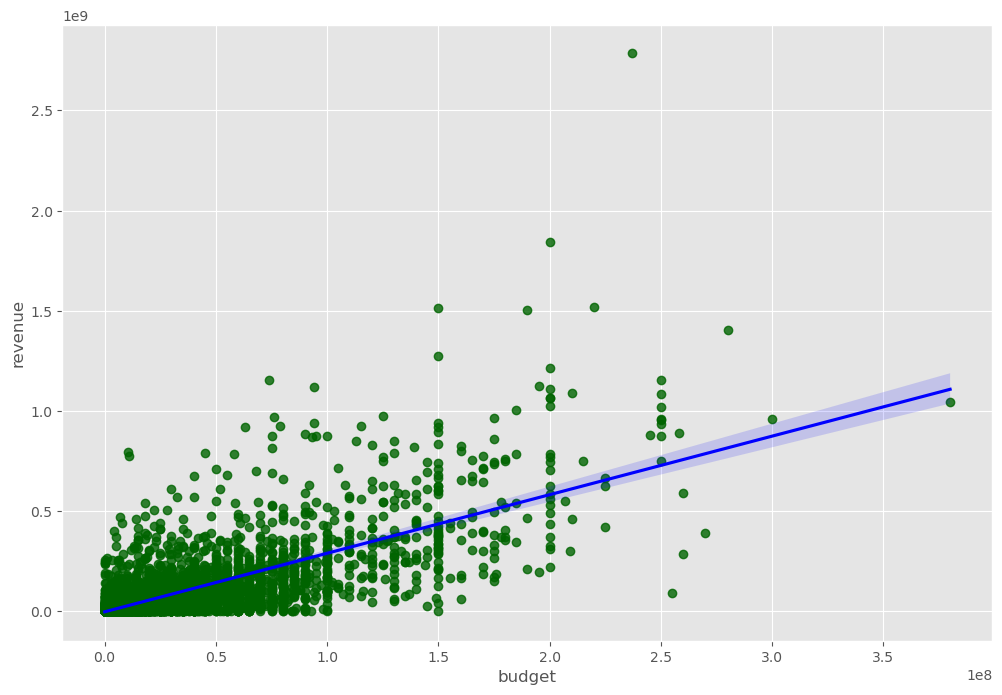

In [114]:
sns.regplot(x='budget', y='revenue', data=df, scatter_kws={'color':"#006400"}, line_kws= {"color" : "blue"})
plt.show()

In [130]:
df.dtypes
numeric_df = df.select_dtypes(include=['number'])
numeric_df.corr(method='pearson')

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count
index,1.000000,-0.761579,0.190771,-0.414342,-0.522110,-0.319370,-0.120157,-0.442207
budget,-0.761579,1.000000,-0.089377,0.505414,0.730823,0.269851,0.093146,0.593180
id,0.190771,-0.089377,1.000000,0.031202,-0.050425,-0.153536,-0.270595,-0.004128
popularity,-0.414342,0.505414,0.031202,1.000000,0.644724,0.225502,0.273952,0.778130
revenue,-0.522110,0.730823,-0.050425,0.644724,1.000000,0.251093,0.197150,0.781487
runtime,-0.319370,0.269851,-0.153536,0.225502,0.251093,1.000000,0.375046,0.271944
vote_average,-0.120157,0.093146,-0.270595,0.273952,0.197150,0.375046,1.000000,0.312997
vote_count,-0.442207,0.593180,-0.004128,0.778130,0.781487,0.271944,0.312997,1.000000


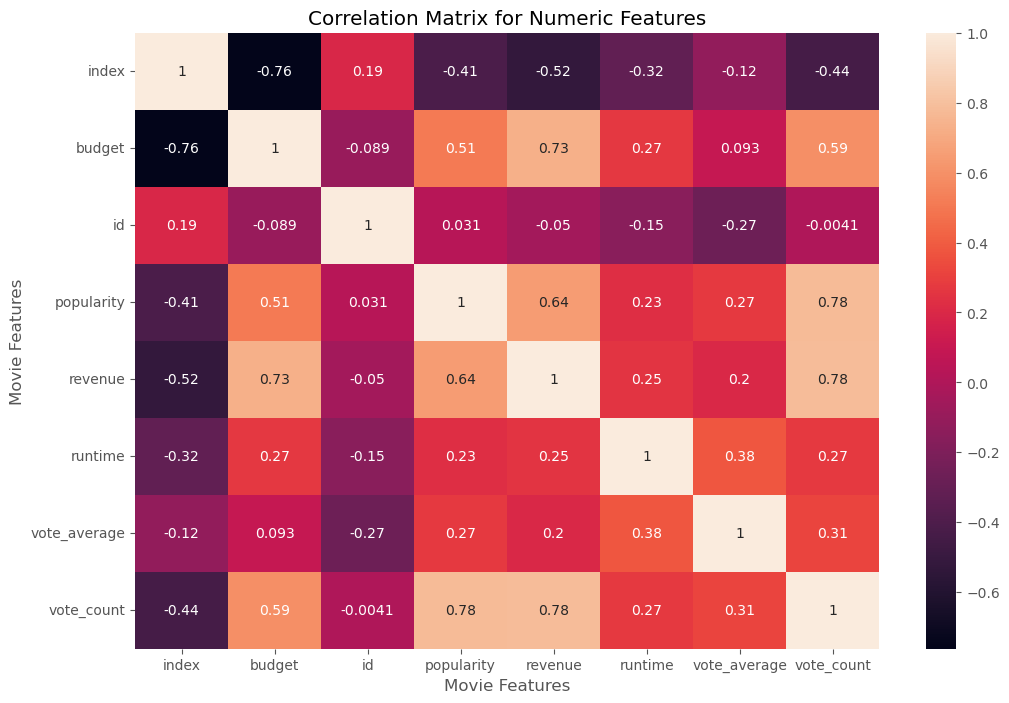

In [136]:
correlation_matrix = numeric_df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()



In [29]:
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,59,461,19995,1025,7,372,2524,150.437577,...,162.0,179,1,732,379,7.2,11800,3972,4133,887
1,1,300000000,327,56,285,2748,7,2665,1662,139.082615,...,169.0,383,1,414,2648,6.9,4500,2292,1010,771
2,2,245000000,29,1281,206647,3636,7,3188,213,107.376788,...,148.0,403,1,97,3181,6.3,4466,966,4447,1971
3,3,250000000,130,1378,49026,1077,7,3594,2076,112.312950,...,165.0,383,1,2688,3612,7.6,9106,800,1762,361
4,4,260000000,71,217,49529,365,7,1891,2794,43.926995,...,132.0,383,1,1824,1901,6.1,2124,4329,196,96


In [63]:

df_numerized = df.copy()

for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,59,461,19995,1025,7,372,2524,150.437577,...,162.0,179,1,732,379,7.2,11800,3972,4133,887
1,1,300000000,327,56,285,2748,7,2665,1662,139.082615,...,169.0,383,1,414,2648,6.9,4500,2292,1010,771
2,2,245000000,29,1281,206647,3636,7,3188,213,107.376788,...,148.0,403,1,97,3181,6.3,4466,966,4447,1971
3,3,250000000,130,1378,49026,1077,7,3594,2076,112.312950,...,165.0,383,1,2688,3612,7.6,9106,800,1762,361
4,4,260000000,71,217,49529,365,7,1891,2794,43.926995,...,132.0,383,1,1824,1901,6.1,2124,4329,196,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,136,-1,9367,3946,8,1138,1951,14.269792,...,81.0,393,1,1137,1145,6.6,238,645,3792,1895
4799,4799,9000,522,-1,72766,-1,7,2463,543,0.642552,...,85.0,0,1,202,2442,5.9,5,1245,1369,605
4800,4800,0,477,760,231617,1072,7,3081,7,1.444476,...,120.0,383,1,-1,3072,7.0,6,1343,655,1997
4801,4801,0,-1,282,126186,-1,7,3034,4556,0.857008,...,98.0,383,1,93,3021,5.7,7,978,955,439


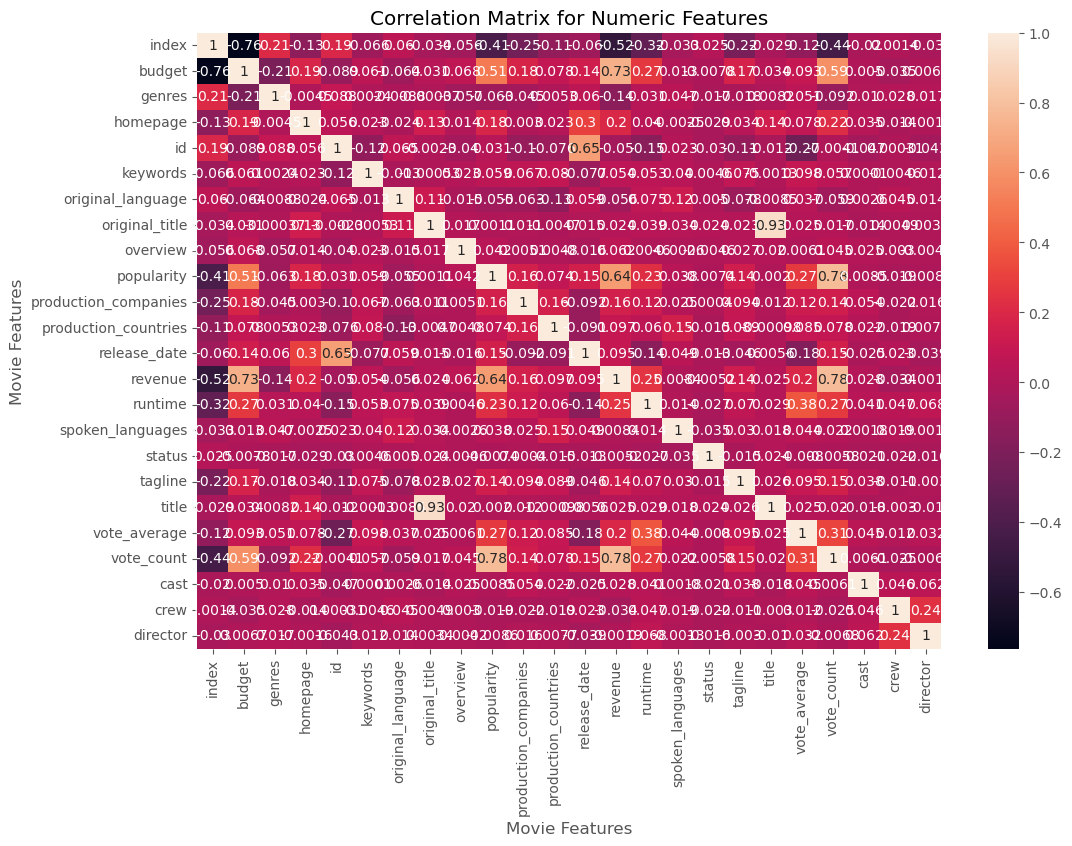

In [69]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()


In [71]:
df_numerized.corr()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
index,1.000000,-0.761579,0.207785,-0.133909,0.190771,-0.065607,0.059620,-0.034180,-0.056192,-0.414342,...,-0.319370,-0.032639,0.024738,-0.220332,-0.028889,-0.120157,-0.442207,-0.020014,0.001425,-0.029753
budget,-0.761579,1.000000,-0.207834,0.185716,-0.089377,0.061423,-0.063656,0.031296,0.068220,0.505414,...,0.269851,0.013335,-0.007760,0.169009,0.034438,0.093146,0.593180,0.004979,-0.035474,0.006674
genres,0.207785,-0.207834,1.000000,-0.004530,0.088353,0.002360,-0.008809,-0.000366,-0.057333,-0.062793,...,0.031210,0.047309,-0.016608,-0.018456,0.008185,0.051051,-0.092298,0.010368,0.027534,0.017113
homepage,-0.133909,0.185716,-0.004530,1.000000,0.055859,0.023018,-0.024141,0.133836,0.014053,0.184900,...,0.039881,-0.002451,-0.028900,0.034273,0.144662,0.077750,0.220009,0.034734,-0.013909,-0.001645
id,0.190771,-0.089377,0.088353,0.055859,1.000000,-0.116534,0.065028,-0.002284,-0.039694,0.031202,...,-0.153536,0.023289,-0.030001,-0.106799,-0.011669,-0.270595,-0.004128,-0.046982,0.000314,-0.043029
keywords,-0.065607,0.061423,0.002360,0.023018,-0.116534,1.000000,-0.012741,-0.000531,0.023350,0.059138,...,0.052871,0.039881,0.004590,0.074815,-0.001266,0.097607,0.056896,0.000100,-0.004585,0.011804
original_language,0.059620,-0.063656,-0.008809,-0.024141,0.065028,-0.012741,1.000000,0.114509,-0.015298,-0.054647,...,0.075434,0.119405,0.004995,-0.078397,-0.008530,0.037147,-0.059301,0.002572,0.045075,0.013695
original_title,-0.034180,0.031296,-0.000366,0.133836,-0.002284,-0.000531,0.114509,1.000000,0.016788,0.001108,...,0.039087,0.033947,0.023882,0.022809,0.934650,0.024664,0.017060,-0.013620,0.004911,0.003436
overview,-0.056192,0.068220,-0.057333,0.014053,-0.039694,0.023350,-0.015298,0.016788,1.000000,0.042328,...,0.004625,-0.002618,-0.004563,0.027157,0.020365,0.006102,0.044630,0.025413,0.002973,-0.004173
popularity,-0.414342,0.505414,-0.062793,0.184900,0.031202,0.059138,-0.054647,0.001108,0.042328,1.000000,...,0.225502,0.037549,-0.007365,0.143263,0.002025,0.273952,0.778130,0.008477,-0.018857,-0.008645


In [75]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
pd.set_option('display.max_rows', None)
corr_pairs

index                 index                   1.000000
                      budget                 -0.761579
                      genres                  0.207785
                      homepage               -0.133909
                      id                      0.190771
                      keywords               -0.065607
                      original_language       0.059620
                      original_title         -0.034180
                      overview               -0.056192
                      popularity             -0.414342
                      production_companies   -0.245186
                      production_countries   -0.111292
                      release_date           -0.060219
                      revenue                -0.522110
                      runtime                -0.319370
                      spoken_languages       -0.032639
                      status                  0.024738
                      tagline                -0.220332
          

In [77]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

index                 budget                 -0.761579
budget                index                  -0.761579
revenue               index                  -0.522110
index                 revenue                -0.522110
                      vote_count             -0.442207
vote_count            index                  -0.442207
popularity            index                  -0.414342
index                 popularity             -0.414342
                      runtime                -0.319370
runtime               index                  -0.319370
vote_average          id                     -0.270595
id                    vote_average           -0.270595
index                 production_companies   -0.245186
production_companies  index                  -0.245186
index                 tagline                -0.220332
tagline               index                  -0.220332
genres                budget                 -0.207834
budget                genres                 -0.207834
vote_avera

In [80]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

popularity            budget                  0.505414
budget                popularity              0.505414
vote_count            budget                  0.593180
budget                vote_count              0.593180
popularity            revenue                 0.644724
revenue               popularity              0.644724
release_date          id                      0.652045
id                    release_date            0.652045
budget                revenue                 0.730823
revenue               budget                  0.730823
popularity            vote_count              0.778130
vote_count            popularity              0.778130
revenue               vote_count              0.781487
vote_count            revenue                 0.781487
original_title        title                   0.934650
title                 original_title          0.934650
release_date          release_date            1.000000
vote_count            vote_count              1.000000
popularity

In [ ]:
# Los votos y el presupuesto tienen mas correlacion con la ganancia
# La compañia de produccion y el cast no tienen correlacion con la ganancia